In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in the cleaned data
df = pd.read_csv("cleaned_data.csv")

In [3]:
df

,Education,Title,Company_Size,Gender,min_salary,max_salary,avg_salary
0,Doctoral degree,Data Scientist,"> 10,000 employees",Male,500000,500000,500000.0
1,Doctoral degree,Data Scientist,"1000-9,999 employees",Male,500000,500000,500000.0
2,Doctoral degree,Data Scientist,0-49 employees,Male,500000,500000,500000.0
3,Doctoral degree,Product/Project Manager,"> 10,000 employees",Male,500000,500000,500000.0
4,Doctoral degree,Business Analyst,"1000-9,999 employees",Male,500000,500000,500000.0
...,...,...,...,...,...,...,...
1172,Some college/university,Software Engineer,0-49 employees,Male,0,999,499.5
1173,Some college/university,Other,50-249 employees,Male,0,999,499.5
1174,Some college/university,Other,0-49 employees,Male,0,999,499.5
1175,I prefer not to answer,Other,0-49 employees,Male,0,999,499.5


In [4]:
df.columns #columns that will be used for modelling

Index(['Education', 'Title', 'Company_Size', 'Gender', 'min_salary',
       'max_salary', 'avg_salary'],
      dtype='object')

In [5]:
df_dum = pd.get_dummies(df) #create the dummy variables

In [6]:
df_dum

,min_salary,max_salary,avg_salary,Education_Bachelor's degree,Education_Doctoral degree,Education_High School,Education_I prefer not to answer,Education_Master's degree,Education_Professional degree,Education_Some college/university,...,Title_Statistician,Company_Size_0-49 employees,"Company_Size_1000-9,999 employees",Company_Size_250-999 employees,Company_Size_50-249 employees,"Company_Size_> 10,000 employees",Gender_Female,Gender_Male,Gender_Not Mentioned,Gender_Self Describe
0,500000,500000,500000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,500000,500000,500000.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,500000,500000,500000.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,500000,500000,500000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,500000,500000,500000.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0,999,499.5,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1173,0,999,499.5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1174,0,999,499.5,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1175,0,999,499.5,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [7]:
#train test splitting
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary',axis=1)
y = df_dum.avg_salary.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 24)

In [8]:
#lasso regression 
from sklearn.linear_model import Lasso 
from sklearn.model_selection import cross_val_score

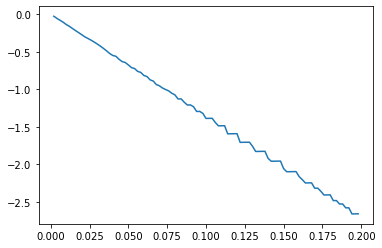

In [9]:
lm_l = Lasso()
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv = 3))
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/500)
    lml = Lasso(alpha=(i/500))
    error.append(np.mean(cross_val_score(lml,
    X_train,y_train, scoring = 'neg_mean_absolute_error', cv = 3)))
    
plt.plot(alpha,error);

In [10]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err.error.mean() #mean absolute error of the Lasso regression

-1.356852216673912

In [15]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-4.785371007237677

In [16]:
#expected lasso regression to be worse than random forest regression since random forest works when it is pure
#classification. However, the neg mean abs error for lasso regression came out to be smaller, thus better.